In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [101]:
# data_train_path = 'Fruits_Vegetables/train'
# data_test_path = 'Fruits_Vegetables/test'
# data_val_path = 'Fruits_Vegetables/validation'

data_train_path = 'Data/Train'
data_test_path = 'Data/Test'
data_val_path = 'Data/Validation'




In [102]:
img_width = 180
img_height =180 

In [103]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 713 files belonging to 4 classes.


In [104]:
data_cat = data_train.class_names

In [105]:
data_cat

['ইতিহাস ও রাজনীতি', 'কমিক্স ও ছবির গল্প', 'গণিত, বিজ্ঞান ও প্রযুক্তি', 'গল্প']

In [106]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                       shuffle=False,
                                                       validation_split=False)

Found 97 files belonging to 4 classes.


In [107]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 195 files belonging to 4 classes.


In [108]:
# plt.figure(figsize=(10,10))
# for image, labels in data_train.take(1):
#     for i in range(9):
#         plt.subplot(3,3,i+1)
#         plt.imshow(image[i].numpy().astype('uint8'))
#         plt.title(data_cat[labels[i]])
#         plt.axis('off')

In [109]:
from tensorflow.keras.models import Sequential

In [110]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [111]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(len(data_cat), activation='softmax')
                  
])

In [112]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [113]:
epochs_size = 14
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/14


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


23/23 [==============================] - 7s 245ms/step - loss: 1.6352 - accuracy: 0.2973 - val_loss: 1.3832 - val_accuracy: 0.2887
Epoch 2/14
23/23 [==============================] - 5s 198ms/step - loss: 1.2949 - accuracy: 0.3983 - val_loss: 1.2752 - val_accuracy: 0.4124
Epoch 3/14
23/23 [==============================] - 5s 190ms/step - loss: 1.0662 - accuracy: 0.5666 - val_loss: 1.1770 - val_accuracy: 0.5258
Epoch 4/14
23/23 [==============================] - 5s 191ms/step - loss: 0.8733 - accuracy: 0.6592 - val_loss: 1.0653 - val_accuracy: 0.5670
Epoch 5/14
23/23 [==============================] - 5s 193ms/step - loss: 0.6958 - accuracy: 0.7195 - val_loss: 1.0782 - val_accuracy: 0.6289
Epoch 6/14
23/23 [==============================] - 5s 197ms/step - loss: 0.5036 - accuracy: 0.7994 - val_loss: 1.1103 - val_accuracy: 0.5773
Epoch 7/14
23/23 [==============================] - 5s 195ms/step - loss: 0.4507 - accuracy: 0.8345 - val_loss: 1.1411 - val_accuracy: 0.6186
Epoch 8/14
23/23 

In [114]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Text(0.5, 1.0, 'Loss')

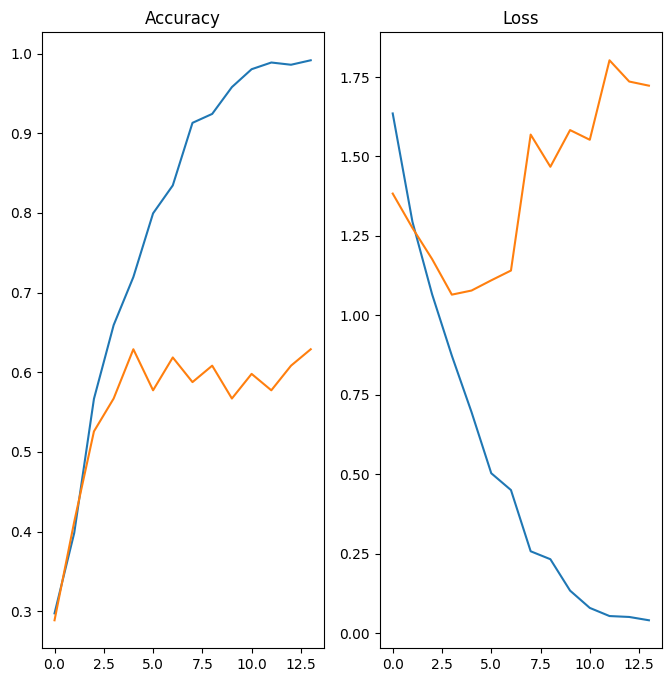

In [115]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [116]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [117]:
evaluation = model.evaluate(data_test)
print(f"Test Loss: {evaluation[0]:.4f}")
print(f"Test Accuracy: {evaluation[1]:.4f}")

7/7 [==============================] - 1s 105ms/step - loss: 1.4505 - accuracy: 0.6410
Test Loss: 1.4505
Test Accuracy: 0.6410


7/7 [==============================] - 1s 120ms/step

Classification Report:
                           precision    recall  f1-score   support

         ইতিহাস ও রাজনীতি       0.61      0.86      0.72        50
       কমিক্স ও ছবির গল্প       0.66      0.85      0.74        47
গণিত, বিজ্ঞান ও প্রযুক্তি       0.69      0.60      0.64        48
                     গল্প       0.59      0.26      0.36        50

                 accuracy                           0.64       195
                macro avg       0.64      0.64      0.62       195
             weighted avg       0.64      0.64      0.61       195


Confusion Matrix:
[[43  1  2  4]
 [ 3 40  2  2]
 [ 4 12 29  3]
 [20  8  9 13]]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 2439 (\N{BENGALI LETTER I}) missing from current font.
  fig.canvas.draw()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.draw()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 2468 (\N{BENGALI LETTER TA}) missing from current font.
  fig.canvas.draw()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 2495 (\N{BENGALI VOWEL SIGN I}) missing from current font.
  fig.canvas.draw()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 2489 (\N{BENGALI LETTER HA}) missing from current font.
  fig.canvas.draw()
/Library/Frameworks/Pyth

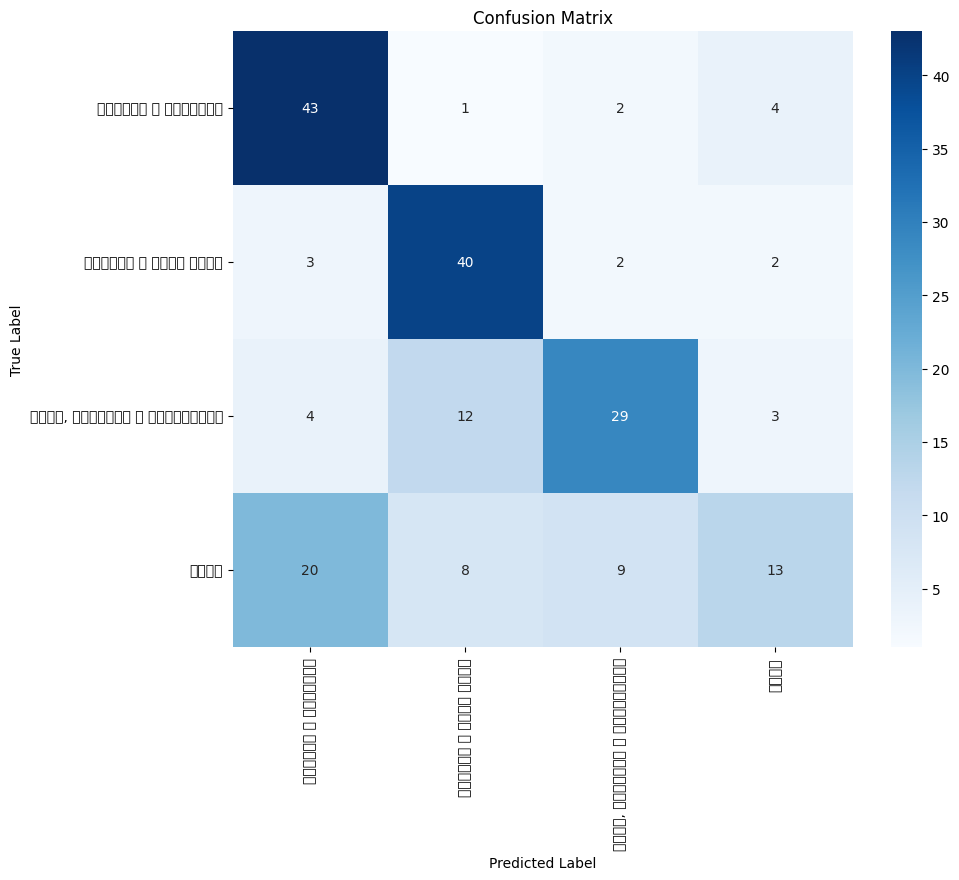

In [118]:

# Assuming data_test is a tf.data.Dataset or similar
# Extract true labels from the dataset
y_true = np.concatenate([y for x, y in data_test], axis=0)

# Generate predictions
y_pred = model.predict(data_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=data_test.class_names))

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print("\nConfusion Matrix:")
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data_test.class_names, yticklabels=data_test.class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [119]:
image = 'Apple.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [120]:
predict = model.predict(img_bat)

1/1 [==============================] - 0s 61ms/step


In [121]:
score = tf.nn.softmax(predict)

In [122]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is ইতিহাস ও রাজনীতি with accuracy of 34.14


In [123]:
# model.save('Image_classify.keras')